# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнила студентка группы БВТ 2005 Бражникова Ангелина Владимировна
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

**Алгоритм Флойда-Уоршелла**| **Алгоритм Дейкстры** | **Алгоритм Беллмана-Форда** | **Алгоритм Джонсона** | **Алгоритм Левита** | **Алгоритм Йена**



### Выполнение:

In [61]:
import sys
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
import time

In [62]:
def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

matrix1 = read_matrix('Lab6_txt/test1.txt') # 3 узла
matrix2 = read_matrix('Lab6_txt/test2.txt') # 10 узлов
matrix3 = read_matrix('Lab6_txt/test3.txt') # 30 узлов
matrix4 = read_matrix('Lab6_txt/test4.txt') # 100 узлов

### Алгоритм Флойда-Уоршелла

Найден следующий лучший маршрут с ценностью 29.
A -> I -> J


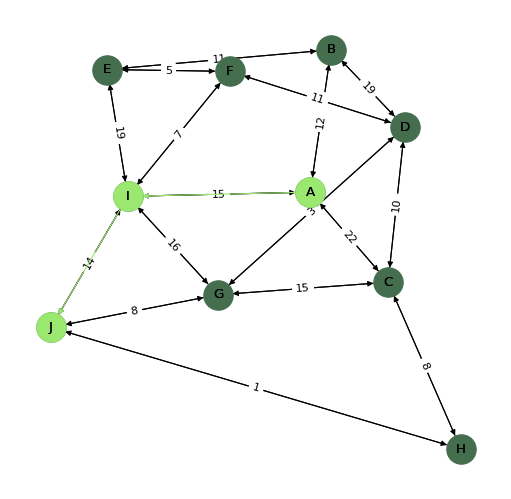

In [63]:
def print_graph(matrix, path):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#446e4e')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#9ae86f', edge_color='#9ae86f')

    plt.show()

def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

def fw_get_path(path, start, end):
    way = [start]
    while start != end:
        start = path[start][end]
        way.append(start)
    for i in range(len(way)):
        way[i] += 1
    return way

    
def floyd_warshall_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    start -= 1
    end -= 1
    for i in range(len(matrix)):
        matrix[i][i] = 0
   
    path = [[v for v in range(len(matrix))] for u in range(len(matrix))]
    for k in range(len(matrix)):
        for i in range(len(matrix)):
            for j in range(len(matrix)):
                if matrix[i][k] < math.inf and matrix[k][j] < math.inf and matrix[i][j] > matrix[i][k] + matrix[k][j]:
                    matrix[i][j] = matrix[i][k] + matrix[k][j]
                    path[i][j] = path[i][k]
    
    return fw_get_path(path,start,end)

matrix = read_matrix('Lab6_txt/1.txt')
copy_matrix = copy.deepcopy(matrix)

start = ord('A')-64
end = ord('J')-64
path = floyd_warshall_path(copy_matrix, start, end)

count = 0
for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        count = count + w

print("Найден следующий лучший маршрут с ценностью {}.".format(count))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### Алгоритм Дейкстры

Найден следующий лучший маршрут с ценностью 29.
A -> I -> J


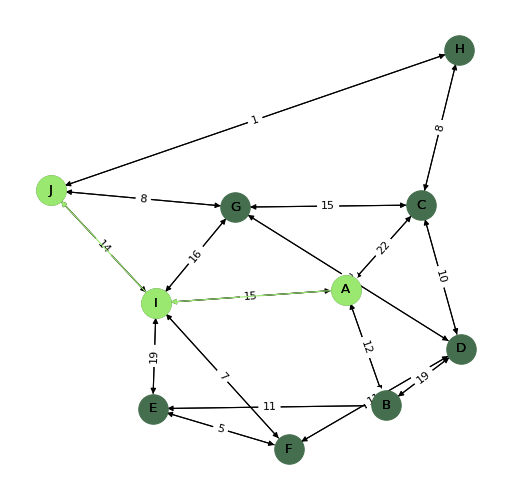

In [65]:
def print_graph(matrix, path):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#446e4e')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#9ae86f', edge_color='#9ae86f')

    plt.show()


def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

def d_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    for i in range(len(result)):
        result[i] += 1
    return result[::-1]

def dijkstra_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    start -= 1
    end -= 1
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node
    if dist[end] == math.inf:
        return [], dist
    else:
        return d_get_path(prev, start, end), dist
    
matrix = read_matrix('Lab6_txt/1.txt')
copy_matrix = copy.deepcopy(matrix)

start = ord('A')-64
end = ord('J')-64
path, d = dijkstra_path(copy_matrix, start, end)

print("Найден следующий лучший маршрут с ценностью {}.".format(d[end-1]))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### Алгоритм Беллмана-Форда

Найден следующий лучший маршрут с ценностью 29.
A -> I -> J


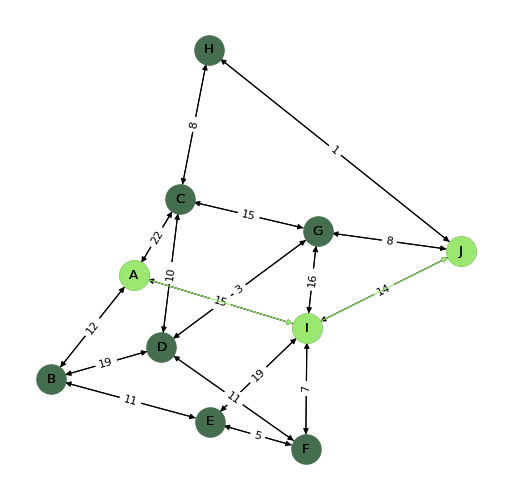

In [66]:
def print_graph(matrix, path, d):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#446e4e')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#9ae86f', edge_color='#9ae86f')

    plt.show()


def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

 
def bellman_ford_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    edges = []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if i != j and matrix[i][j] < math.inf:
                edges.append((i,j,matrix[i][j]))
    start -= 1
    end -= 1
    from_pos = 0
    to_pos = 1
    edge_length = 2
    d = [math.inf] * len(matrix)
    d[start] = 0
    p = [-1] * len(matrix)
    while True:
        flag = False
        for j in range(len(edges)):
            if d[edges[j][from_pos]] < math.inf:
                if d[edges[j][to_pos]] > d[edges[j][from_pos]] + edges[j][edge_length]: 
                    d[edges[j][to_pos]] = d[edges[j][from_pos]] + edges[j][edge_length]
                    p[edges[j][to_pos]] =  edges[j][from_pos]
                    flag = True
        if not flag:  
            break
    if d[end] == math.inf:
        return [], d
    else:
        path = []
        cur = end
        while cur != -1:
            path.append(cur)
            cur=p[cur]
        for i in range(len(path)):
            path[i] += 1
        return path[::-1], d


matrix = read_matrix('Lab6_txt/1.txt')
copy_matrix = copy.deepcopy(matrix)

start = ord('A')-64
end = ord('J')-64
path, d = bellman_ford_path(copy_matrix, start, end)

print("Найден следующий лучший маршрут с ценностью {}.".format(d[end-1]))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path, d)

### Алгоритм Джонсона

Найден следующий лучший маршрут с ценностью 29.
A -> I -> J


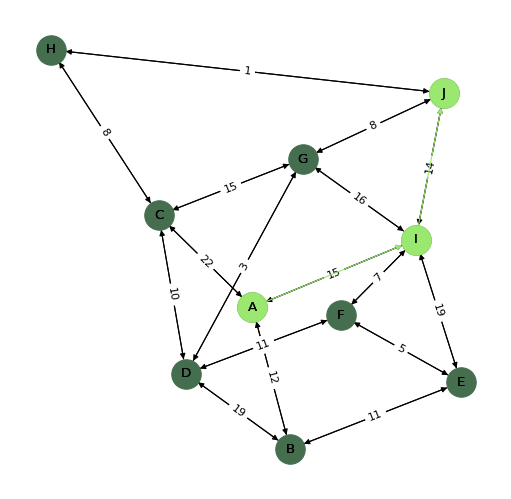

In [67]:
def print_graph(matrix, path):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#446e4e')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#9ae86f', edge_color='#9ae86f')

    plt.show()

def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

    
def johnsons_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    start -= 1
    end -= 1
    bf_path, bf_dist = bellman_ford_path(copy.deepcopy(matrix), start, end) 
    
    if bf_dist == []: 
        return []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                matrix[i][j] += bf_dist[i] - bf_dist[j]
    paths = []
    dist = []
    for i in range(len(matrix)):
        p, d = dijkstra_path(matrix, i + 1, end + 1)
        paths.append(p)
        dist.append(d)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if dist[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                dist[i][j] +=  bf_dist[j] - bf_dist[i]
    return paths[start]


matrix = read_matrix('Lab6_txt/1.txt')
copy_matrix = copy.deepcopy(matrix)

for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0

start = ord('A')-64
end = ord('J')-64
path = johnsons_path(copy_matrix, start, end)

count = 0
for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        count = count + w

print("Найден следующий лучший маршрут с ценностью {}.".format(count))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### Алгоритм Левита

Найден следующий лучший маршрут с ценностью 29.
A -> I -> J


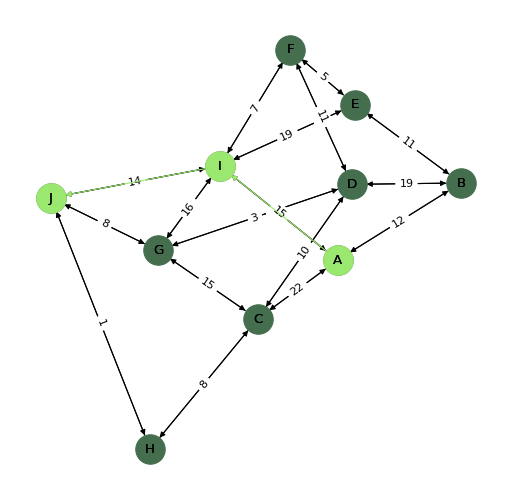

In [68]:
def print_graph(matrix, path):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#446e4e')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#9ae86f', edge_color='#9ae86f')

    plt.show()


def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

 
def levit_path(matrix, start, end):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    start -= 1
    end -= 1
    researched = []
    queues = {1 : [start], 2 : []}
    not_visited = [i for i in range(len(matrix))]
    not_visited.remove(start)
    dist = [math.inf] * len(matrix)
    dist[start] = 0
    path = [[start] for i in range(len(matrix))]
    while len(queues[1]) or len(queues[2]):
        if len(queues[2]) != 0:
            cur = queues[2].pop(0)
        else:
            cur = queues[1].pop(0)
        for ver in range(len(matrix)):
            if ver in not_visited:
                dist[ver] = dist[cur] + matrix[cur][ver]
                not_visited.remove(ver)
                queues[1].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
            elif ver in queues[1] or ver in queues[2]:
                if matrix[cur][ver] != math.inf and dist[ver] > dist[cur] + matrix[cur][ver]:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
                dist[ver] = min(dist[ver], dist[cur] + matrix[cur][ver])
            elif ver in researched and dist[ver] > dist[cur] + matrix[cur][ver]:
                dist[ver] = dist[cur] + matrix[cur][ver]
                researched.remove(ver)
                queues[2].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
        researched.append(cur)
    result = path[end]
    for i in range(len(result)):
        result[i] += 1
    return result


matrix = read_matrix('Lab6_txt/1.txt')
copy_matrix = copy.deepcopy(matrix)

for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0

start = ord('A')-64
end = ord('J')-64
path = levit_path(copy_matrix, start, end)

count = 0
for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]-1:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]-1:
                        count = count + w

print("Найден следующий лучший маршрут с ценностью {}.".format(count))
shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+64)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### Алгоритм Йена

Найден следующий лучший маршрут с ценностью 29.
A -> I -> J


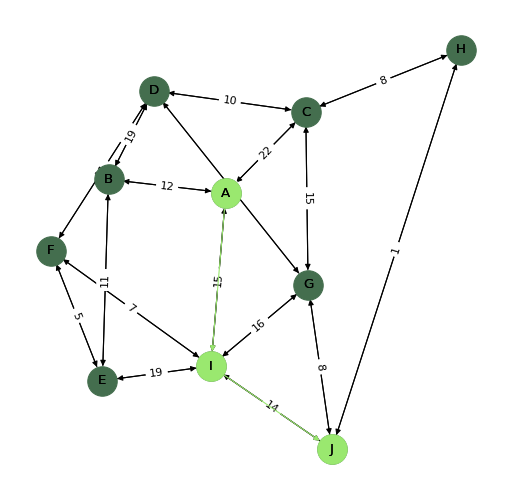

Найден альтернативный маршрут с ценностью 31.
A -> C -> H -> J


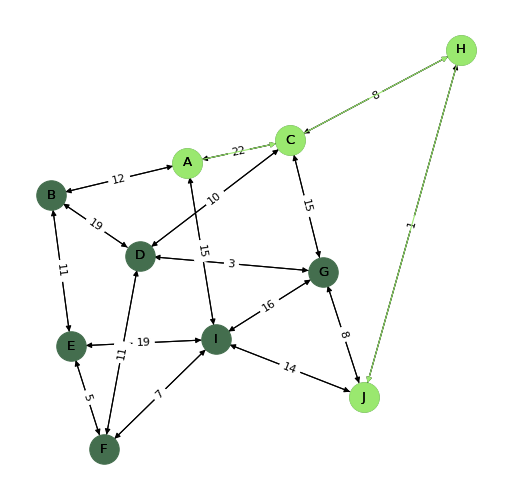

Найден альтернативный маршрут с ценностью 43.
A -> C -> D -> G -> J


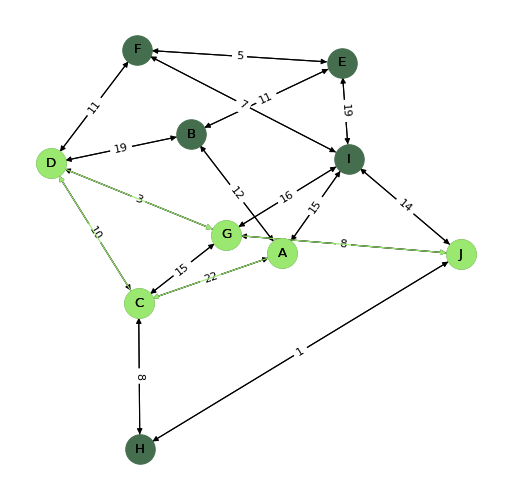

Найден альтернативный маршрут с ценностью 49.
A -> B -> E -> F -> I -> J


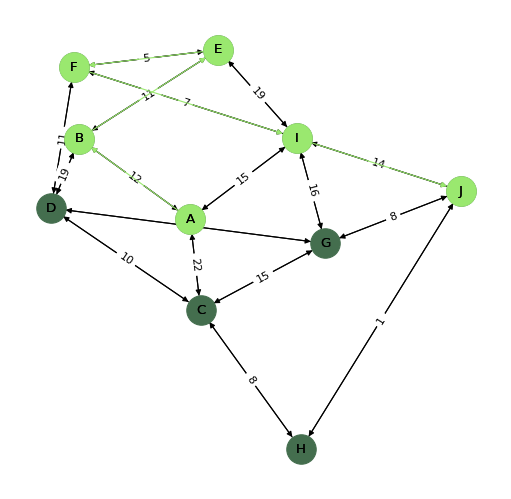

In [69]:
def print_graph(matrix, path):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0
    temp =[]
    for z in range(len(path)):
        temp = path[z]
        count = 0
        G = nx.DiGraph()
        H = nx.DiGraph()
        for el1, vector in enumerate(matrix):
            for el2, w in enumerate(vector):
                if w > 0:
                    G.add_edge(chr(el1+65), chr(el2+65), weight=w)
        for i in range(len(temp)-1):
            for el1, vector in enumerate(matrix):
                if el1 == temp[i]:
                    for el2, w in enumerate(vector):
                        if el2 == temp[i+1]:
                            H.add_edge(chr(el1+65), chr(el2+65), weight=w)
                            count = count + w
        edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
        node_labels = {node:node for node in G.nodes()}

        # Установка параметров вывода
        plt.figure(num=None, figsize=(8, 8), dpi=80)
        pos = nx.spring_layout(G)

        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        nx.draw(G, pos, node_size = 700, node_color = '#446e4e')

        nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
        nx.draw_networkx_labels(H, pos, labels=node_labels)
        nx.draw(H, pos, node_size = 700, node_color = '#9ae86f', edge_color='#9ae86f')
        
        if z == 0:
            print("Найден следующий лучший маршрут с ценностью {}.".format(count))
        else:
            print("Найден альтернативный маршрут с ценностью {}.".format(count))
        shortcut = copy.deepcopy(temp)
        for i in range (len(shortcut)):
            shortcut[i] = chr(shortcut[i]+65)
        print(" -> ".join(shortcut))

        plt.show()


def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

def md_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    return result[::-1]

def mod_dijkstra(matrix, start):
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
   
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node
    
    paths = []
    for i in range(len(matrix)):
        paths.append(md_get_path(prev, start, i))
    return dist, paths
    
def yen_path(matrix, start, end, k_max = 1):
    for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = math.inf
    candidates = set()
    start -= 1
    end -= 1
    
    d, p = mod_dijkstra(matrix, start)
    paths = [p[end]]
    dists = [d[end]]
    
    for k in range(1, k_max):
        cur_matrix = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            node_spur = paths[-1][i]
            path_root = paths[-1][:i + 1]
            
            for line in paths:
                if path_root == line[:i + 1] and i + 1 < len(line):
                    cur_matrix[line[i]][line[i + 1]] = math.inf        
                        
            for node in path_root:
                if node != node_spur:
                    cur_matrix[node] = [math.inf] * len(matrix)

            d, p = mod_dijkstra(cur_matrix, node_spur)

            spur_path = p[end][1:]
            if len(spur_path) != 0:
                f_path = path_root
                for t_node in spur_path:
                    f_path.append(t_node)
                f_path = tuple(f_path)
                f_dist = 0
                for j in range(1, len(f_path)):
                    f_dist += matrix[f_path[j - 1]][f_path[j]]
                candidates.add((f_path, f_dist))
                
            if not len(candidates):
                break
            
            temp_candidates = list(candidates)
            paths.append(list(temp_candidates[0][0]))
            dists.append(temp_candidates[0][1])
            candidates.remove(temp_candidates[0])
            
    result = []
    for i in range(len(paths)):
        for j in range(len(paths[i])):
            paths[i][j] += 1
        if len(result) < k_max:
            result.append(paths[i])
        else:
            return result

matrix = read_matrix('Lab6_txt/1.txt')
copy_matrix = copy.deepcopy(matrix)

for i, vector in enumerate(matrix):
        for j, w in enumerate(vector):
            if matrix[i][j] == 9999:
                matrix[i][j] = 0

start = ord('A')-64
end = ord('J')-64
K = 4
path = yen_path(copy_matrix, start, end, K)

temp = []
for el1, vector in enumerate(path):
    for el2, w in enumerate(vector):
        w = w - 1
        temp.append(w)
    path[el1] = temp
    temp = []

print_graph(matrix, path)

### Вывод

In [70]:
#1---------------------------Флойд-Уоршелл--------------------------------------------------
matrix1_floyd_warshall_path = copy.deepcopy(matrix1) #<---- 3 узла
matrix2_floyd_warshall_path = copy.deepcopy(matrix2) #<---- 10 узлов
matrix3_floyd_warshall_path = copy.deepcopy(matrix3) #<---- 30 узлов
matrix4_floyd_warshall_path = copy.deepcopy(matrix4) #<---- 100 узлов

start_time = time.time()
floyd_warshall_path(matrix1_floyd_warshall_path, 1, 3)
time_matrix1_floyd_warshall_path = "{0} ms".format(round((time.time() - start_time)*1000))
floyd_warshall_path(matrix2_floyd_warshall_path, 1, 10)
time_matrix2_floyd_warshall_path = "{0} ms".format(round((time.time() - start_time)*1000))
floyd_warshall_path(matrix3_floyd_warshall_path, 1, 30)
time_matrix3_floyd_warshall_path = "{0} ms".format(round((time.time() - start_time)*1000))
floyd_warshall_path(matrix4_floyd_warshall_path, 1, 100)
time_matrix4_floyd_warshall_path = "{0} ms".format(round((time.time() - start_time)*1000))
#-----------------------------------------------------------------------------

#2---------------------------Дейкстра--------------------------------------------------
matrix1_dijkstra_path = copy.deepcopy(matrix1) #<---- 3 узла
matrix2_dijkstra_path = copy.deepcopy(matrix2) #<---- 10 узлов
matrix3_dijkstra_path = copy.deepcopy(matrix3) #<---- 30 узлов
matrix4_dijkstra_path = copy.deepcopy(matrix4) #<---- 100 узлов

start_time = time.time()
dijkstra_path(matrix1_dijkstra_path, 1, 3)
time_matrix1_dijkstra_path = "{0} ms".format(round((time.time() - start_time)*1000))
dijkstra_path(matrix2_dijkstra_path, 1, 10)
time_matrix2_dijkstra_path = "{0} ms".format(round((time.time() - start_time)*1000))
dijkstra_path(matrix3_dijkstra_path, 1, 30)
time_matrix3_dijkstra_path = "{0} ms".format(round((time.time() - start_time)*1000))
dijkstra_path(matrix4_dijkstra_path, 1, 100)
time_matrix4_dijkstra_path = "{0} ms".format(round((time.time() - start_time)*1000))
#-----------------------------------------------------------------------------

#3---------------------------Беллман-Форд--------------------------------------------------
matrix1_bellman_ford_path = copy.deepcopy(matrix1) #<---- 3 узла
matrix2_bellman_ford_path = copy.deepcopy(matrix2) #<---- 10 узлов
matrix3_bellman_ford_path = copy.deepcopy(matrix3) #<---- 30 узлов
matrix4_bellman_ford_path = copy.deepcopy(matrix4) #<---- 100 узлов

start_time = time.time()
bellman_ford_path(matrix1_bellman_ford_path, 1, 3)
time_matrix1_bellman_ford_path = "{0} ms".format(round((time.time() - start_time)*1000))
bellman_ford_path(matrix2_bellman_ford_path, 1, 10)
time_matrix2_bellman_ford_path = "{0} ms".format(round((time.time() - start_time)*1000))
bellman_ford_path(matrix3_bellman_ford_path, 1, 30)
time_matrix3_bellman_ford_path = "{0} ms".format(round((time.time() - start_time)*1000))
bellman_ford_path(matrix4_bellman_ford_path, 1, 100)
time_matrix4_bellman_ford_path = "{0} ms".format(round((time.time() - start_time)*1000))
#-----------------------------------------------------------------------------

#4---------------------------Джонсон--------------------------------------------------
matrix1_johnsons_path = copy.deepcopy(matrix1) #<---- 3 узла
matrix2_johnsons_path = copy.deepcopy(matrix2) #<---- 10 узлов
matrix3_johnsons_path = copy.deepcopy(matrix3) #<---- 30 узлов
matrix4_johnsons_path = copy.deepcopy(matrix4) #<---- 100 узлов

start_time = time.time()
johnsons_path(matrix1_johnsons_path, 1, 3)
time_matrix1_johnsons_path = "{0} ms".format(round((time.time() - start_time)*1000))
johnsons_path(matrix2_johnsons_path, 1, 10)
time_matrix2_johnsons_path ="{0} ms".format(round((time.time() - start_time)*1000))
johnsons_path(matrix3_johnsons_path, 1, 30)
time_matrix3_johnsons_path = "{0} ms".format(round((time.time() - start_time)*1000))
johnsons_path(matrix4_johnsons_path, 1, 100)
time_matrix4_johnsons_path = "{0} ms".format(round((time.time() - start_time)*1000))
#-----------------------------------------------------------------------------

#5---------------------------Левит--------------------------------------------------
matrix1_levit_path = copy.deepcopy(matrix1) #<---- 3 узла
matrix2_levit_path = copy.deepcopy(matrix2) #<---- 10 узлов
matrix3_levit_path = copy.deepcopy(matrix3) #<---- 30 узлов
matrix4_levit_path = copy.deepcopy(matrix4) #<---- 100 узлов

start_time = time.time()
levit_path(matrix1_levit_path, 1, 3)
time_matrix1_levit_path = "{0} ms".format(round((time.time() - start_time)*1000))
levit_path(matrix2_levit_path, 1, 10)
time_matrix2_levit_path = "{0} ms".format(round((time.time() - start_time)*1000))
levit_path(matrix3_levit_path, 1, 30)
time_matrix3_levit_path = "{0} ms".format(round((time.time() - start_time)*1000))
levit_path(matrix4_levit_path, 1, 100)
time_matrix4_levit_path = "{0} ms".format(round((time.time() - start_time)*1000))
#-----------------------------------------------------------------------------

#6---------------------------Йен--------------------------------------------------
matrix1_yen_path = copy.deepcopy(matrix1) #<---- 3 узла
matrix2_yen_path = copy.deepcopy(matrix2) #<---- 10 узлов
matrix3_yen_path = copy.deepcopy(matrix3) #<---- 30 узлов
matrix4_yen_path = copy.deepcopy(matrix4) #<---- 100 узлов

start_time = time.time()
yen_path(matrix1_yen_path, 1, 3)
time_matrix1_yen_path = "{0} ms".format(round((time.time() - start_time)*1000))
yen_path(matrix2_yen_path, 1, 10)
time_matrix2_yen_path = "{0} ms".format(round((time.time() - start_time)*1000))
yen_path(matrix3_yen_path, 1, 30)
time_matrix3_yen_path = "{0} ms".format(round((time.time() - start_time)*1000))
yen_path(matrix4_yen_path, 1, 100)
time_matrix4_yen_path = "{0} ms".format(round((time.time() - start_time)*1000))
#-----------------------------------------------------------------------------

In [10]:
table_time = [[3,time_matrix1_floyd_warshall_path, time_matrix1_dijkstra_path, time_matrix1_bellman_ford_path, time_matrix1_johnsons_path, time_matrix1_levit_path, time_matrix1_yen_path],
              [10, time_matrix2_floyd_warshall_path, time_matrix2_dijkstra_path, time_matrix2_bellman_ford_path, time_matrix2_johnsons_path, time_matrix2_levit_path, time_matrix2_yen_path], 
              [30, time_matrix3_floyd_warshall_path, time_matrix3_dijkstra_path, time_matrix3_bellman_ford_path, time_matrix3_johnsons_path, time_matrix3_levit_path, time_matrix3_yen_path],
              [100, time_matrix4_floyd_warshall_path, time_matrix4_dijkstra_path, time_matrix4_bellman_ford_path, time_matrix4_johnsons_path, time_matrix4_levit_path, time_matrix4_yen_path]]

pd.DataFrame(table_time, columns=["Количество узлов","Алгоритм Флойда-Уоршелла","Алгоритм Дейкстры","Алгоритм Беллмана-Форда","Алгоритм Джонсона","Алгоритм Левита","Алгоритм Йена"])
               
            

,Количество узлов,Алгоритм Флойда-Уоршелла,Алгоритм Дейкстры,Алгоритм Беллмана-Форда,Алгоритм Джонсона,Алгоритм Левита,Алгоритм Йена
0,3,0 ms,0 ms,0 ms,0 ms,0 ms,0 ms
1,10,0 ms,0 ms,0 ms,0 ms,0 ms,0 ms
2,30,24 ms,0 ms,0 ms,16 ms,0 ms,0 ms
3,100,686 ms,16 ms,16 ms,671 ms,16 ms,16 ms
